# A rather naive way to visualize uncertainies in histograms

This is not a great way but sometimes it might be just good enough. Note that we assume Gaussuan uncertainties here.

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


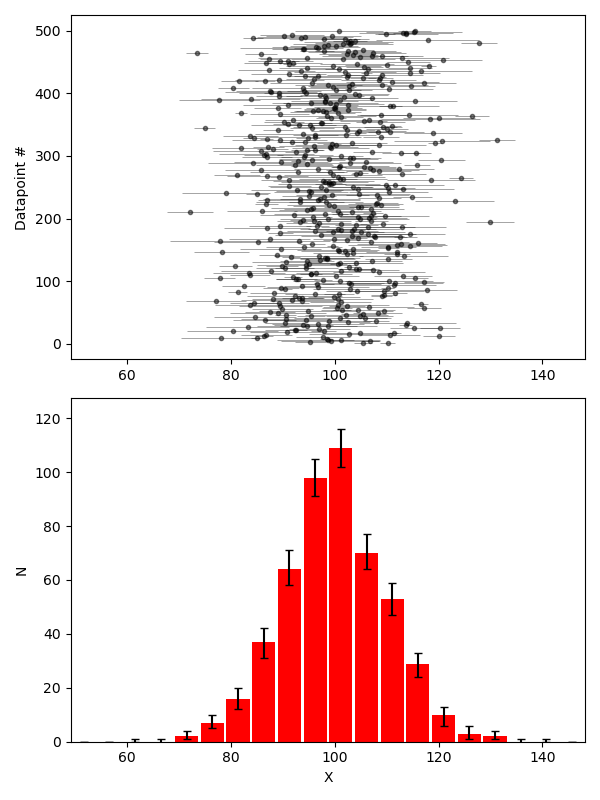

In [3]:
np.random.seed(1244)
npoints = 500
data = np.random.normal(100, 10, size=npoints)
error = np.random.uniform(1.0, 10.0, size=npoints)

# You need your bin edges set through out 
nbins = 20
bins = np.linspace(min(data-3*error),max(data+3*error),nbins+1)
bin_centers = 0.5*(bins[1:]+bins[:-1])   #For plotting

# This is the histogram bins based on the data
main_hist = np.histogram(data,bins=bins)[0]

# Now we run bootstrap sampling, assuming the data has normal distribution
niter = 1000
realizations = np.empty([niter,npoints])
sim = np.empty([niter,nbins])
for i in range(niter):
    realized = np.random.normal(data,error)
    realizations[i] = realized
    sim[i] = np.histogram(realized,bins=bins)[0]

# Using quantile to estimate the 1-sigma bounds
bin_err_lo = np.quantile(sim,0.5,axis=0)-np.quantile(sim,0.16,axis=0)
bin_err_hi = np.quantile(sim,0.84,axis=0)-np.quantile(sim,0.5,axis=0)

fig = plt.figure(figsize=(6,8))
ax0 = plt.subplot2grid((2,1),(0,0))
ax0.errorbar(y=np.arange(1,len(data)+1), x=data, xerr=error, fmt='.k', elinewidth=0.5, alpha=0.5)
ax0.set(ylabel='Datapoint #',xlim=[bins.min(),bins.max()])
ax1 = plt.subplot2grid((2,1),(1,0))
ax1.bar(bin_centers, main_hist, yerr=[bin_err_lo,bin_err_hi],
        width=(bin_centers[1]-bin_centers[0])*0.9, color='r', capsize=3)
ax1.set(xlabel='X',ylabel='N', xlim=ax0.get_xlim(), ylim=[0,max(main_hist+bin_err_hi)*1.1])
fig.tight_layout()